# Visualizing the models with pyLDAvis

- Import package

In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import pythainlp

In [2]:
from wordcloud import WordCloud 
from pythainlp.corpus import thai_stopwords
from pythainlp.tokenize import word_tokenize # ใช้ในการตัดคำ
from pythainlp.corpus import thai_stopwords
from pythainlp.corpus import wordnet
from nltk.stem.porter import PorterStemmer
from nltk.corpus import words
from stop_words import get_stop_words

In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

- Check Directory

In [6]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is E212-CB33

 Directory of C:\Users\LENOVO\Documents\LegalDoc_project4

10/23/2020  05:20 PM    <DIR>          .
10/23/2020  05:20 PM    <DIR>          ..
10/23/2020  03:50 PM    <DIR>          .ipynb_checkpoints
10/16/2020  03:11 AM    <DIR>          __MACOSX
09/23/2020  02:45 AM         3,199,421 23.zip
10/23/2020  04:44 PM         3,172,667 Clean_all_real.xlsx
10/23/2020  04:47 PM           161,037 Clean_Data.ipynb
10/23/2020  03:56 PM           206,869 Clean_marut_real.xlsx
10/23/2020  04:33 PM            31,716 Clean_MOJ_real.xlsx
10/23/2020  04:26 PM         2,815,834 Clean_pamook_real.xlsx
10/23/2020  04:39 PM            13,741 Clean_sappaneti_real.xlsx
10/23/2020  04:38 PM           486,478 Clean_Thanaiphorn_real.xlsx
11/13/2019  02:52 PM       175,385,569 consumer_complaints.csv
06/28/2020  01:10 AM         3,171,809 Data Scraping.ipynb
10/13/2020  01:39 AM           117,673 Data Scraping_Exmple.ipynb
10/13/2020  01:39 A

- Load Data 

In [9]:
Clean_all = pd.read_excel("Clean_all_real.xlsx", header=[0])

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\LENOVO\miniconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\LENOVO\miniconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\LENOVO\miniconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in 

In [10]:
Clean_all

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


คำถาม  \
0                  ''คุณธรรม''สำคัญว่า''ความสามารถ''หรอ   
1     เรียนท่านรมตกระทรวงยุติธรรมนอกจากสถาบันเทิงในเ...   
2     เนื่องด้วยมีผู้ประกอบการที่จำหน่ายเครื่องดื่มแ...   
3     เนื่องด้วยชาวชุมชนหลังแม็คโครรังสิตกำลังได้รับ...   
4     เนื่องด้วยชาวชุมชนหลังแม็คโครรังสิตกำลังได้รับ...   
...                                                 ...   
4658  อยากรบกวนปรึกษาหากกรณีที่แม่ถูกดำเนินคดีอาจถึง...   
4659  นายกเปิดตัวลงสมัครสทแล้วเร่ิมแจกเงินทุกงานทุกผ...   
4660  เรียนปมุขกฎหมายผมมีเรื่องขอปรึกษาดังนี้ผู้เช่า...   
4661  ยังไม่ได้แบ่งทรัพย์สินแต่ผู้จัดการมรดกเสียชีวิ...   
4662  แย่งเมียคนอื่นมาทำเมียจนมีลูกด้วยกันแล้วทิ้งผิ...   

                                                  คำตอบ  
0     สำคัญมากเพราะถ้าคนเก่งมีความสามารถแต่เป็นคนไม่...  
1     ผมคิดว่าการสั่งปิดสถานบันเทิงรอบสถานศึกษานั้นไ...  
2     การออกกฏหมายโดยวิธีการนี้ไม่สามารถแก้ปัญหาการด...  
3     มีการละเมิดสิทธิของประชาชนทำให้ไร้ศักดิ์ศรีควา...  
4     ทางกระทรวงได้รับทราบในเบื้องต้นแล้วและขอทราบรา...  
...                                                 ...  
4658  อำนาจการปกครองตามข้อเท็จจริงเบื้องต้นป้าก็ต้อง...  
4659  ซื้อเสียงอาจจะเข้าข่ายการซื้อเสียงก็ต้องรวบรวม...  
4660  การเช่าการเช่าต้องมีหลักฐานเป็นหนังสือถ้าเช่าส...  
4661  ผู้จัดการมรดกเป็นตัวแทนของเจ้ามรดกผู้ตายมีหน้า...  
4662  จริยธรรมนักการเมืองความเห็นตามข้อเท็จจริงที่บอ...  

[4663 rows x 2 columns]

# function Word tokenize

In [4]:
import nltk
nltk.download('words')
th_stop = ' '.join(list(thai_stopwords()))
#th_stop = tuple(thai_stopwords('thai'))
en_stop = tuple(get_stop_words('en'))
p_stemmer = PorterStemmer()

[nltk_data] Downloading package words to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [5]:
def split_word(text):
     
    tokens = word_tokenize(text,engine='newmm')
   # url = "https://api.aiforthai.in.th/tlexplus"
    #headers = {'Apikey': "TcFxpsM6D7Hen9iWO5CnvHlNv8fsyBwW"}
    #data = {'text':text}
   # respons = requests.post(url, data=data ,headers=headers)
    #tokens = respons.json()['tokens']
    #data_all.append(data1.json()['tokens'])

    # Remove stop words ภาษาไทย และภาษาอังกฤษ
    tokens = [i for i in tokens if not i in th_stop and not i in en_stop]
    
    # หารากศัพท์ภาษาไทย และภาษาอังกฤษ
    # English
    tokens = [p_stemmer.stem(i) for i in tokens]
    
    # Thai
    tokens_temp=[]
    for i in tokens:
        w_syn = wordnet.synsets(i)
        if (len(w_syn)>0) and (len(w_syn[0].lemma_names('tha'))>0):
            tokens_temp.append(w_syn[0].lemma_names('tha')[0])
        else:
            tokens_temp.append(i)
    
    tokens = tokens_temp
    
    # ลบตัวเลข
    tokens = [i for i in tokens if not i.isnumeric()]
    
    # ลบช่องว่าง
    tokens = [i for i in tokens if not ' ' in i]

    return tokens

# 1. Visualizing Topic of Question

- **Step 1: Tokenize**

In [24]:
data_Q = []

#tokens_list = [split_word(txt) for txt in clean_text]
for i in range(len(Clean_all)):
    tokens_list = split_word(Clean_all["คำถาม"][i])
    data_Q.append(tokens_list)
    #time.sleep(0.5)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [26]:
data_Q

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[["''", 'คุณธรรม', "''", "''", 'ความสามารถ', "''", 'หรอ'],
 ['เรียน',
  'มต',
  'กระทรวงยุติธรรม',
  'สถาบัน',
  'เทิง',
  'เขต',
  'เป็นข่าว',
  'เรียน',
  'เสนอ',
  'ทีมงาน',
  'ชอง',
  'พื้นที่',
  'ย่าน',
  'เกษตร',
  'นวมินทร์',
  'สี่แยก',
  'ตัด',
  'ถ.',
  'พหลโยธิน',
  'ทราบ',
  'ผับ',
  'เรียงราย',
  'ริมถนน',
  'ร้าน',
  'หัน',
  'ลำโพง',
  'ขนาดใหญ่',
  'ถ.',
  'ตั้งโต๊ะ',
  'ถ.',
  'เลน',
  'ซ้าย',
  'สร้าง',
  'ความเดือดร้อน',
  'สัญจร',
  'พักอาศัย',
  'ละแวก',
  'ใกล้เคียง',
  'หัวค่ำ',
  'ผับ',
  'สถานบันเทิง',
  'สร้าง',
  'มลพิษทางเสียง',
  'พักอาศัย',
  'ส่วน',
  'นิสิต',
  'ปชช.',
  'ทั่วไป',
  'หลังคาเรือน',
  'ปชช.',
  'ซ.',
  'พหลโยธิน',
  'การร้องเรียน',
  'สน',
  'สนง.',
  'หลายครั้ง',
  'แต่กลับ',
  'ความคืบหน้า',
  'มต',
  'ทีมงาน',
  'ตรวจวัด',
  'ระดับเสียง',
  'ซ.',
  'พหลโยธิน',
  'ห่าง',
  'ผับ',
  'มั่นใจ',
  'ทีมงาน',
  'ใจถึง',
  'ความเดือดร้อน',
  'ผู้อาศัย',
  'ถ่องแท้',
  'ขอบใจ',
  'ละเลย',
  'ประเด็นสำคัญ',
  'ปชช.',
  'ได้รับความเดือดร้อน',
  '

- **Step 2 : Bag of words + count word + tf**

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

tokens_list_j = [','.join(tkn) for tkn in data_Q]
cvec = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat = cvec.fit_transform(tokens_list_j)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\LENOVO\miniconda3\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [28]:
bag_Q = cvec.vocabulary_

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
bag_Q 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{"''": 10,
 'คุณธรรม': 1636,
 'ความสามารถ': 1393,
 'หรอ': 7606,
 'เรียน': 9230,
 'มต': 5322,
 'กระทรวงยุติธรรม': 170,
 'สถาบัน': 6902,
 'เทิง': 8802,
 'เขต': 8350,
 'เป็นข่าว': 8985,
 'เสนอ': 9394,
 'ทีมงาน': 3508,
 'ชอง': 2091,
 'พื้นที่': 5130,
 'ย่าน': 5769,
 'เกษตร': 8295,
 'นวมินทร์': 3728,
 'สี่แยก': 7298,
 'ตัด': 2770,
 'ถ.': 3088,
 'พหลโยธิน': 5006,
 'ทราบ': 3258,
 'ผับ': 4637,
 'เรียงราย': 9229,
 'ริมถนน': 6096,
 'ร้าน': 6241,
 'หัน': 7716,
 'ลำโพง': 6429,
 'ขนาดใหญ่': 785,
 'ตั้งโต๊ะ': 2854,
 'เลน': 9269,
 'ซ้าย': 2370,
 'สร้าง': 6997,
 'ความเดือดร้อน': 1420,
 'สัญจร': 7106,
 'พักอาศัย': 5030,
 'ละแวก': 6363,
 'ใกล้เคียง': 10385,
 'หัวค่ำ': 7725,
 'สถานบันเทิง': 6893,
 'มลพิษทางเสียง': 5336,
 'ส่วน': 7394,
 'นิสิต': 3866,
 'ปชช.': 4218,
 'ทั่วไป': 3340,
 'หลังคาเรือน': 7657,
 'ซ.': 2280,
 'การร้องเรียน': 558,
 'สน': 6908,
 'สนง.': 6910,
 'หลายครั้ง': 7672,
 'แต่กลับ': 9777,
 'ความคืบหน้า': 1305,
 'ตรวจวัด': 2695,
 'ระดับเสียง': 5900,
 'ห่าง': 7794,
 'มั่นใจ': 5399,
 'ใจถึง': 

In [32]:
type(data_Q)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


list

**Step 3 : Bag of words + tf-idf**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec = TfidfVectorizer(analyzer=lambda x:x.split(','),)
t_feat = tvec.fit_transform(tokens_list_j)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [34]:
print(t_feat.shape)

(4663, 10853)


C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
type(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


scipy.sparse.csr.csr_matrix

In [37]:
type(cvec)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


sklearn.feature_extraction.text.CountVectorizer

In [38]:
type(c_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


scipy.sparse.csr.csr_matrix

# Fit Latent Dirichlet Allocation models


- ## the LDA models are fitted.


## **Question**

In [40]:
# for TF Question
lda_tf = LatentDirichletAllocation(20, random_state=0)
lda_tf.fit(c_feat)
# for TFIDF Question
lda_tfidf = LatentDirichletAllocation(20, random_state=0)
lda_tfidf.fit(t_feat)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=20, random_state=0)

In [41]:
pyLDAvis.sklearn.prepare(lda_tf, c_feat, cvec)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14    -0.190041  0.091523       1        1  10.714661
18     0.009427 -0.176198       2        1  10.181907
19    -0.067533 -0.237159       3        1   8.944743
12    -0.161077  0.091053       4        1   8.546559
7     -0.183196 -0.045660       5        1   6.970242
16    -0.108563 -0.129884       6        1   6.687738
6      0.020055  0.011938       7        1   6.114957
5      0.069868  0.094344       8        1   5.252406
1      0.091720  0.084355       9        1   4.554764
9      0.099965 -0.028163      10        1   4.401664
11    -0.132325  0.118483      11        1   4.011403
10     0.177154 -0.048015      12        1   3.835059
17     0.120095 -0.133152      13        1   3.255095
3      0.030718  0.138819      14        1   3.073877
15     0.196290  0.038332      15        1   2.445402
13    -0.108627 -0.021165      16        1   2.426457
8      0.066669  0.062188      17        1   2.318782
4      0.084042  0.059688      18        1   2.234475
2      0.035667  0.021569      19        1   2.072771
0     -0.050310  0.007104      20        1   1.957038, topic_info=        Term         Freq        Total Category  logprob  loglift
2523   ดิฉัน  4511.000000  4511.000000  Default  30.0000  30.0000
7486     หนู  1038.000000  1038.000000  Default  29.0000  29.0000
4003  บริษัท  2031.000000  2031.000000  Default  28.0000  28.0000
3518  ที่ดิน  1880.000000  1880.000000  Default  27.0000  27.0000
5155     พ่อ  1208.000000  1208.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
3489   ทำได้    15.605884   274.284266  Topic20  -5.5782   1.0672
5501    มีผล    14.111157   179.062542  Topic20  -5.6789   1.3930
3258    ทราบ    16.618334  1685.600673  Topic20  -5.5154  -0.6856
8484    เงิน    15.129737  1798.761723  Topic20  -5.6092  -0.8445
5784    ย้าย    14.121931   330.964306  Topic20  -5.6781   0.7795

[1444 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
10        13  0.879769      ''
55         7  0.817335    ก.ย.
56        15  0.807437    กกหู
69         1  0.058508  กฎหมาย
69         2  0.014627  กฎหมาย
...      ...       ...     ...
10843      6  0.217159       ”
10843      9  0.096515       ”
10843     10  0.554961       ”
10843     20  0.072386       ”
10846     18  0.861410       •

[4801 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 19, 20, 13, 8, 17, 7, 6, 2, 10, 12, 11, 18, 4, 16, 14, 9, 5, 3, 1])

In [42]:
pyLDAvis.sklearn.prepare(lda_tfidf, t_feat, cvec)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.358288 -0.113811       1        1  33.778921
18     0.369019  0.113347       2        1  32.304551
7     -0.028442 -0.069962       3        1   3.167400
10    -0.048940  0.017050       4        1   2.218448
17    -0.047195  0.001077       5        1   2.090912
19    -0.041939  0.013842       6        1   2.050262
0     -0.045347  0.006661       7        1   2.009057
1     -0.030721 -0.004389       8        1   1.986804
16    -0.045645 -0.004128       9        1   1.973902
9     -0.045714  0.006489      10        1   1.854071
13    -0.039408 -0.000353      11        1   1.796069
11    -0.040574 -0.001140      12        1   1.768181
15    -0.040983 -0.000849      13        1   1.732530
5     -0.038689  0.012764      14        1   1.730672
4     -0.035862  0.007398      15        1   1.694683
8     -0.041072  0.005222      16        1   1.667754
12    -0.040649  0.002623      17        1   1.623272
14    -0.041195  0.002592      18        1   1.553441
2     -0.036831  0.004298      19        1   1.519094
3     -0.038100  0.001270      20        1   1.479976, topic_info=           Term        Freq       Total Category  logprob  loglift
2523      ดิฉัน  173.000000  173.000000  Default  30.0000  30.0000
3518     ที่ดิน   96.000000   96.000000  Default  29.0000  29.0000
4638        ผัว   67.000000   67.000000  Default  28.0000  28.0000
4003     บริษัท   93.000000   93.000000  Default  27.0000  27.0000
5155        พ่อ   67.000000   67.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
3776   นักเรียน    0.385822    2.492919  Topic20  -6.6670   2.3473
474     การทราบ    0.449192    4.159325  Topic20  -6.5149   1.9875
6433  ลิขสิทธิ์    0.438533    3.888191  Topic20  -6.5390   2.0309
7650    หลักเขต    0.290901    1.199748  Topic20  -6.9494   2.7963
1652   คุ้มครอง    0.292442    5.516823  Topic20  -6.9441   1.2759

[1015 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
0          8  0.991481          
69         1  0.627115    กฎหมาย
69         2  0.209038    กฎหมาย
69         3  0.041808    กฎหมาย
69         8  0.083615    กฎหมาย
...      ...       ...       ...
10727      4  0.759163  ไล่เบี้ย
10758      1  0.937132      ไอซ์
10820      1  0.134827         ​
10820     13  0.808965         ​
10839      2  0.485454         “

[758 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 19, 8, 11, 18, 20, 1, 2, 17, 10, 14, 12, 16, 6, 5, 9, 13, 15, 3, 4])

- # Using different MDS functions

### With sklearn installed, other MDS functions, such as MMDS and TSNE can be used for plotting if the default PCoA is not satisfactory.

In [43]:
pyLDAvis.sklearn.prepare(lda_tf, c_feat, cvec, mds='mmds')

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
14     0.234229  0.225754       1        1  10.714661
18     0.093832 -0.227194       2        1  10.181907
19     0.178946 -0.312354       3        1   8.944743
12     0.125139  0.327240       4        1   8.546559
7      0.295409 -0.000287       5        1   6.970242
16     0.311102 -0.158031       6        1   6.687738
6      0.020812  0.040939       7        1   6.114957
5     -0.092446 -0.047518       8        1   5.252406
1     -0.237961  0.143000       9        1   4.554764
9     -0.101210  0.097071      10        1   4.401664
11     0.208586  0.160694      11        1   4.011403
10    -0.219793 -0.078018      12        1   3.835059
17    -0.296364 -0.186294      13        1   3.255095
3     -0.232873  0.321402      14        1   3.073877
15    -0.112839 -0.330336      15        1   2.445402
13    -0.006339  0.274211      16        1   2.426457
8     -0.149186 -0.229242      17        1   2.318782
4     -0.295191  0.035292      18        1   2.234475
2      0.082783 -0.091701      19        1   2.072771
0      0.193363  0.035372      20        1   1.957038, topic_info=        Term         Freq        Total Category  logprob  loglift
2523   ดิฉัน  4511.000000  4511.000000  Default  30.0000  30.0000
7486     หนู  1038.000000  1038.000000  Default  29.0000  29.0000
4003  บริษัท  2031.000000  2031.000000  Default  28.0000  28.0000
3518  ที่ดิน  1880.000000  1880.000000  Default  27.0000  27.0000
5155     พ่อ  1208.000000  1208.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
3489   ทำได้    15.605884   274.284266  Topic20  -5.5782   1.0672
5501    มีผล    14.111157   179.062542  Topic20  -5.6789   1.3930
3258    ทราบ    16.618334  1685.600673  Topic20  -5.5154  -0.6856
8484    เงิน    15.129737  1798.761723  Topic20  -5.6092  -0.8445
5784    ย้าย    14.121931   330.964306  Topic20  -5.6781   0.7795

[1444 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
10        13  0.879769      ''
55         7  0.817335    ก.ย.
56        15  0.807437    กกหู
69         1  0.058508  กฎหมาย
69         2  0.014627  กฎหมาย
...      ...       ...     ...
10843      6  0.217159       ”
10843      9  0.096515       ”
10843     10  0.554961       ”
10843     20  0.072386       ”
10846     18  0.861410       •

[4801 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 19, 20, 13, 8, 17, 7, 6, 2, 10, 12, 11, 18, 4, 16, 14, 9, 5, 3, 1])

In [44]:
pyLDAvis.sklearn.prepare(lda_tf, c_feat, cvec, mds='tsne')

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
14     -10.878068   10.538728       1        1  10.714661
18     -60.884026  -75.591820       2        1  10.181907
19      -2.336119  -53.289074       3        1   8.944743
12     -61.385319  -12.914634       4        1   8.546559
7      -28.737743  126.296997       5        1   6.970242
16       1.066606 -123.552811       6        1   6.687738
6       45.140720   -7.947869       7        1   6.114957
5     -140.795975  -98.530548       8        1   5.252406
1       61.531681  -83.240562       9        1   4.554764
9      -72.563057 -140.396881      10        1   4.401664
11      15.984491   63.578186      11        1   4.011403
10    -160.851624   68.945145      12        1   3.835059
17      85.961830   51.922935      13        1   3.255095
3      -99.020836  109.936348      14        1   3.073877
15    -176.764130   -8.681684      15        1   2.445402
13    -117.189880  -37.420200      16        1   2.426457
8      108.829918  -22.946203      17        1   2.318782
4       47.588097  121.934814      18        1   2.234475
2     -106.467834   30.176889      19        1   2.072771
0      -50.613804   59.328842      20        1   1.957038, topic_info=        Term         Freq        Total Category  logprob  loglift
2523   ดิฉัน  4511.000000  4511.000000  Default  30.0000  30.0000
7486     หนู  1038.000000  1038.000000  Default  29.0000  29.0000
4003  บริษัท  2031.000000  2031.000000  Default  28.0000  28.0000
3518  ที่ดิน  1880.000000  1880.000000  Default  27.0000  27.0000
5155     พ่อ  1208.000000  1208.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
3489   ทำได้    15.605884   274.284266  Topic20  -5.5782   1.0672
5501    มีผล    14.111157   179.062542  Topic20  -5.6789   1.3930
3258    ทราบ    16.618334  1685.600673  Topic20  -5.5154  -0.6856
8484    เงิน    15.129737  1798.761723  Topic20  -5.6092  -0.8445
5784    ย้าย    14.121931   330.964306  Topic20  -5.6781   0.7795

[1444 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
10        13  0.879769      ''
55         7  0.817335    ก.ย.
56        15  0.807437    กกหู
69         1  0.058508  กฎหมาย
69         2  0.014627  กฎหมาย
...      ...       ...     ...
10843      6  0.217159       ”
10843      9  0.096515       ”
10843     10  0.554961       ”
10843     20  0.072386       ”
10846     18  0.861410       •

[4801 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[15, 19, 20, 13, 8, 17, 7, 6, 2, 10, 12, 11, 18, 4, 16, 14, 9, 5, 3, 1])

# 2. Visualizing Topic of Anwering

- **Step 1: Tokenize**

In [45]:
data_anw = []

#tokens_list = [split_word(txt) for txt in clean_text]
for i in range(len(Clean_all)):
    tokens_list = split_word(Clean_all["คำตอบ"][i])
    data_anw.append(tokens_list)
    #time.sleep(0.5)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
data_anw

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['คนเก่ง',
  'ความสามารถ',
  'คุณธรรม',
  'สังคม',
  'ฟัง',
  'คนโง่',
  'เหยื่อ',
  'ฉลาด',
  'ดิฉัน',
  'ดิฉัน',
  'คนโง่',
  'เหยื่อ',
  'คนเลว',
  'ฉลาด',
  'คุณธรรม',
  'เอาเปรียบ',
  'โกง',
  '«',
  'กันยายน'],
 ['ว่าการ',
  'สั่ง',
  'สถานบันเทิง',
  'รอบ',
  'สถานศึกษา',
  'ไขปัญหา',
  'การวิวาท',
  'กิน',
  'ในทางกลับกัน',
  'มีผล',
  'ประกอบอาชีพ',
  'ปชช.',
  'รายได้',
  'หลัก',
  'ปชช.',
  'เดือด',
  'ร้อนใน',
  'รายได้',
  'สถานศึกษา',
  'ชนบท',
  'อยาก',
  'สถานบันเทิง',
  'ใกล้เคียง',
  'สถานศึกษา',
  'ปัจจัย',
  'ระยะทาง',
  'ความปลอดภัย',
  'อยาก',
  'แก้ไขปัญหา',
  'การวิวาท',
  'เมา',
  'เข้มงวด',
  'กฎหมาย',
  'เจาะจง',
  'คน',
  'ออกกฎหมาย',
  'สถานบันเทิง',
  'รอบ',
  'สถาบัน'],
 ['วิธีการ',
  'ไขปัญหา',
  'กิน',
  'รบ.',
  'ไขปัญหา',
  'ส่วนหนึ่ง',
  'สร้าง',
  'ปัญหา',
  'รบ.',
  'ไม่ต้อง',
  'การควบคุม',
  'อีกด้วย'],
 ['ละเมิด',
  'สิทธิ',
  'ปชช.',
  'ไร้',
  'ศักดิ์ศรี',
  'ความเป็นคน',
  'ปชช.',
  'ได้รับความเดือดร้อน',
  'กลาย',
  'เป็นปัญหา',
  'สังคม',


- **Step 2 : Bag of words + count word + tf**

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

tokens_list_a = [','.join(tkn) for tkn in data_anw]
cvec_a = CountVectorizer(analyzer=lambda x:x.split(','))
c_feat_a = cvec_a.fit_transform(tokens_list_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\LENOVO\miniconda3\lib\asyncio\events.py:81: DeprecationWarning: `run_cell_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  self._context.run(self._callback, *self._args)


In [48]:
bag_a = cvec_a.vocabulary_

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [49]:
bag_a

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


{'คนเก่ง': 1160,
 'ความสามารถ': 1401,
 'คุณธรรม': 1656,
 'สังคม': 6956,
 'ฟัง': 5071,
 'คนโง่': 1178,
 'เหยื่อ': 9317,
 'ฉลาด': 2039,
 'ดิฉัน': 2467,
 'คนเลว': 1171,
 'เอาเปรียบ': 9398,
 'โกง': 9822,
 '«': 40,
 'กันยายน': 337,
 'ว่าการ': 6567,
 'สั่ง': 7008,
 'สถานบันเทิง': 6731,
 'รอบ': 5760,
 'สถานศึกษา': 6738,
 'ไขปัญหา': 10274,
 'การวิวาท': 573,
 'กิน': 703,
 'ในทางกลับกัน': 10152,
 'มีผล': 5402,
 'ประกอบอาชีพ': 4120,
 'ปชช.': 4072,
 'รายได้': 5946,
 'หลัก': 7522,
 'เดือด': 8559,
 'ร้อนใน': 6084,
 'ชนบท': 2076,
 'อยาก': 7764,
 'ใกล้เคียง': 10086,
 'ปัจจัย': 4326,
 'ระยะทาง': 5790,
 'ความปลอดภัย': 1342,
 'แก้ไขปัญหา': 9483,
 'เมา': 8980,
 'เข้มงวด': 8236,
 'กฎหมาย': 58,
 'เจาะจง': 8412,
 'คน': 1109,
 'ออกกฎหมาย': 7818,
 'สถาบัน': 6743,
 'วิธีการ': 6514,
 'รบ.': 5714,
 'ส่วนหนึ่ง': 7293,
 'สร้าง': 6851,
 'ปัญหา': 4333,
 'ไม่ต้อง': 10372,
 'การควบคุม': 395,
 'อีกด้วย': 7988,
 'ละเมิด': 6200,
 'สิทธิ': 7120,
 'ไร้': 10409,
 'ศักดิ์ศรี': 6611,
 'ความเป็นคน': 1452,
 'ได้รับความเดือดร้อน'

- **Step 3 : Bag of words + tf-idf**

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

tvec_a = TfidfVectorizer(analyzer=lambda x:x.split(','),)
t_feat_a = tvec_a.fit_transform(tokens_list_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Fit Latent Dirichlet Allocation models


- ## the LDA models are fitted.


## **Anwering**

In [51]:
# for TF Anwering
lda_tf_a = LatentDirichletAllocation(20, random_state=0)
lda_tf_a.fit(c_feat_a)
# for TFIDF Anwering
lda_tfidf_a = LatentDirichletAllocation(20, random_state=0)
lda_tfidf_a.fit(t_feat_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=20, random_state=0)

In [53]:
pyLDAvis.sklearn.prepare(lda_tf_a, c_feat_a, cvec_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.030621  0.092742       1        1  13.493573
10    -0.078546  0.129649       2        1   9.847034
13     0.176697 -0.047330       3        1   9.839799
19     0.165322  0.144451       4        1   8.164505
8      0.167427 -0.066119       5        1   6.503974
0      0.007421  0.169032       6        1   5.799201
4     -0.098744 -0.062457       7        1   4.918258
6     -0.069376  0.067922       8        1   4.615340
3      0.189943  0.068541       9        1   4.575770
18    -0.154891 -0.148588      10        1   4.062844
2     -0.068225 -0.000397      11        1   3.822881
12    -0.076929  0.062478      12        1   3.805288
5     -0.039271 -0.056315      13        1   3.285394
17    -0.193753  0.098366      14        1   3.164304
9     -0.007516 -0.090219      15        1   2.922400
1      0.052145 -0.204648      16        1   2.795527
11     0.036071 -0.051738      17        1   2.503957
15    -0.008567 -0.109481      18        1   2.461112
16     0.077155  0.020897      19        1   2.185782
14    -0.045743 -0.016787      20        1   1.233056, topic_info=        Term         Freq        Total Category  logprob  loglift
1969   จำเลย  1353.000000  1353.000000  Default  30.0000  30.0000
9858   โจทก์  1017.000000  1017.000000  Default  29.0000  29.0000
3400  ที่ดิน  1771.000000  1771.000000  Default  28.0000  28.0000
3875  บริษัท   968.000000   968.000000  Default  27.0000  27.0000
6973   สัญญา  1452.000000  1452.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
9044  เรื่อง    13.274112  2029.214403  Topic20  -5.3135  -0.6339
8561   เดือน    12.121018   643.712315  Topic20  -5.4044   0.4234
6973   สัญญา    11.920009  1452.862539  Topic20  -5.4211  -0.4074
8336     เคส    11.716942  1317.466613  Topic20  -5.4383  -0.3268
4326  ปัจจัย    10.927630   248.686889  Topic20  -5.5080   1.2708

[1379 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
0          5  0.968272         
16         1  0.908043        ?
16        12  0.004779        ?
16        14  0.076467        ?
16        20  0.009558        ?
...      ...       ...      ...
10494     13  0.010418        ”
10494     14  0.010418        ”
10494     15  0.005209        ”
10494     18  0.010418        ”
10505     16  0.895777  …………………

[4886 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 14, 20, 9, 1, 5, 7, 4, 19, 3, 13, 6, 18, 10, 2, 12, 16, 17, 15])

In [54]:
pyLDAvis.sklearn.prepare(lda_tfidf_a, t_feat_a, cvec_a)

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.373797 -0.082499       1        1  51.113359
1     -0.151442  0.202468       2        1   7.113789
8     -0.128973  0.051439       3        1   5.589839
18    -0.022579 -0.119201       4        1   3.794673
10    -0.011135 -0.119680       5        1   3.641223
7      0.041768  0.026809       6        1   2.681192
0      0.020517  0.050469       7        1   2.329593
12     0.058368  0.001417       8        1   2.195014
9      0.055880  0.000418       9        1   2.181261
17     0.050426 -0.011256      10        1   2.069483
13     0.050953  0.005806      11        1   2.037343
19     0.015379 -0.020599      12        1   1.982312
5      0.050451  0.004739      13        1   1.846681
4      0.049686  0.000212      14        1   1.811972
2      0.046080 -0.009674      15        1   1.781030
16     0.052529  0.005923      16        1   1.723758
15     0.053397  0.003277      17        1   1.684565
11     0.047508  0.002543      18        1   1.486972
3      0.048158  0.003761      19        1   1.473820
14     0.046828  0.003629      20        1   1.462121, topic_info=                Term       Freq      Total Category  logprob  loglift
3400          ที่ดิน  77.000000  77.000000  Default  30.0000  30.0000
4016            บุตร  48.000000  48.000000  Default  29.0000  29.0000
6973           สัญญา  82.000000  82.000000  Default  28.0000  28.0000
1955           จำคุก  35.000000  35.000000  Default  27.0000  27.0000
5041             พ่อ  36.000000  36.000000  Default  26.0000  26.0000
...              ...        ...        ...      ...      ...      ...
3239           ทั่วๆ   0.386074   3.740132  Topic20  -6.6680   1.9544
9622        แบบฟอร์ม   0.356090   3.767638  Topic20  -6.7489   1.8663
3940      บัตรเครดิต   0.334457   4.535353  Topic20  -6.8115   1.6181
4588   ผู้ถูกกล่าวหา   0.295567   1.486859  Topic20  -6.9351   2.6098
10299    ได้ประโยชน์   0.297708   2.336403  Topic20  -6.9279   2.1650

[1005 rows x 6 columns], token_table=       Topic      Freq           Term
term                                 
0          3  0.919499               
57        14  0.732037        กฎจราจร
58         1  0.899740         กฎหมาย
58         2  0.020449         กฎหมาย
58         4  0.020449         กฎหมาย
...      ...       ...            ...
10372      3  0.045102        ไม่ต้อง
10412      6  0.715510  ไร้ความสามารถ
10425      6  0.375618         ไล่ออก
10426     12  0.647200       ไล่เบี้ย
10453      5  0.453830           ไอซ์

[1114 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 9, 19, 11, 8, 1, 13, 10, 18, 14, 20, 6, 5, 3, 17, 16, 12, 4, 15])

- # Using different MDS functions

In [55]:
pyLDAvis.sklearn.prepare(lda_tf_a, c_feat_a, cvec_a, mds='mmds')

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
7     -0.243966  0.224047       1        1  13.493573
10     0.054485 -0.251597       2        1   9.847034
13     0.087377  0.349227       3        1   9.839799
19    -0.298275 -0.058642       4        1   8.164505
8     -0.082670  0.299406       5        1   6.503974
0     -0.037394  0.089683       6        1   5.799201
4      0.368497 -0.036529       7        1   4.918258
6     -0.059431 -0.061234       8        1   4.615340
3      0.026283  0.274110       9        1   4.575770
18    -0.040000 -0.370982      10        1   4.062844
2     -0.309357  0.067334      11        1   3.822881
12     0.048293 -0.077226      12        1   3.805288
5     -0.186384  0.100157      13        1   3.285394
17     0.275095 -0.202959      14        1   3.164304
9      0.205633  0.027171      15        1   2.922400
1      0.323499  0.193342      16        1   2.795527
11     0.155078  0.153591      17        1   2.503957
15     0.178212 -0.287554      18        1   2.461112
16    -0.289690 -0.171946      19        1   2.185782
14    -0.175285 -0.259400      20        1   1.233056, topic_info=        Term         Freq        Total Category  logprob  loglift
1969   จำเลย  1353.000000  1353.000000  Default  30.0000  30.0000
9858   โจทก์  1017.000000  1017.000000  Default  29.0000  29.0000
3400  ที่ดิน  1771.000000  1771.000000  Default  28.0000  28.0000
3875  บริษัท   968.000000   968.000000  Default  27.0000  27.0000
6973   สัญญา  1452.000000  1452.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
9044  เรื่อง    13.274112  2029.214403  Topic20  -5.3135  -0.6339
8561   เดือน    12.121018   643.712315  Topic20  -5.4044   0.4234
6973   สัญญา    11.920009  1452.862539  Topic20  -5.4211  -0.4074
8336     เคส    11.716942  1317.466613  Topic20  -5.4383  -0.3268
4326  ปัจจัย    10.927630   248.686889  Topic20  -5.5080   1.2708

[1379 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
0          5  0.968272         
16         1  0.908043        ?
16        12  0.004779        ?
16        14  0.076467        ?
16        20  0.009558        ?
...      ...       ...      ...
10494     13  0.010418        ”
10494     14  0.010418        ”
10494     15  0.005209        ”
10494     18  0.010418        ”
10505     16  0.895777  …………………

[4886 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 14, 20, 9, 1, 5, 7, 4, 19, 3, 13, 6, 18, 10, 2, 12, 16, 17, 15])

In [56]:
pyLDAvis.sklearn.prepare(lda_tf_a, c_feat_a, cvec_a, mds='tsne')

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
7      -10.878068   10.538728       1        1  13.493573
10     -60.884026  -75.591820       2        1   9.847034
13      -2.336119  -53.289074       3        1   9.839799
19     -61.385319  -12.914634       4        1   8.164505
8      -28.737743  126.296997       5        1   6.503974
0        1.066606 -123.552811       6        1   5.799201
4       45.140720   -7.947869       7        1   4.918258
6     -140.795975  -98.530548       8        1   4.615340
3       61.531681  -83.240562       9        1   4.575770
18     -72.563057 -140.396881      10        1   4.062844
2       15.984491   63.578186      11        1   3.822881
12    -160.851624   68.945145      12        1   3.805288
5       85.961830   51.922935      13        1   3.285394
17     -99.020836  109.936348      14        1   3.164304
9     -176.764130   -8.681684      15        1   2.922400
1     -117.189880  -37.420200      16        1   2.795527
11     108.829918  -22.946203      17        1   2.503957
15      47.588097  121.934814      18        1   2.461112
16    -106.467834   30.176889      19        1   2.185782
14     -50.613804   59.328842      20        1   1.233056, topic_info=        Term         Freq        Total Category  logprob  loglift
1969   จำเลย  1353.000000  1353.000000  Default  30.0000  30.0000
9858   โจทก์  1017.000000  1017.000000  Default  29.0000  29.0000
3400  ที่ดิน  1771.000000  1771.000000  Default  28.0000  28.0000
3875  บริษัท   968.000000   968.000000  Default  27.0000  27.0000
6973   สัญญา  1452.000000  1452.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
9044  เรื่อง    13.274112  2029.214403  Topic20  -5.3135  -0.6339
8561   เดือน    12.121018   643.712315  Topic20  -5.4044   0.4234
6973   สัญญา    11.920009  1452.862539  Topic20  -5.4211  -0.4074
8336     เคส    11.716942  1317.466613  Topic20  -5.4383  -0.3268
4326  ปัจจัย    10.927630   248.686889  Topic20  -5.5080   1.2708

[1379 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
0          5  0.968272         
16         1  0.908043        ?
16        12  0.004779        ?
16        14  0.076467        ?
16        20  0.009558        ?
...      ...       ...      ...
10494     13  0.010418        ”
10494     14  0.010418        ”
10494     15  0.005209        ”
10494     18  0.010418        ”
10505     16  0.895777  …………………

[4886 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[8, 11, 14, 20, 9, 1, 5, 7, 4, 19, 3, 13, 6, 18, 10, 2, 12, 16, 17, 15])

# WordCloud

In [57]:
from wordcloud import WordCloud 

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [58]:
path =  'C:\\Users\\LENOVO\\Documents\\LegalDoc_project4\\THSarabunNew Bold.ttf'
stopwords = ["และ","เช่น","ครับ","หรือ","ๆ","อยู่แล้ว","มากขึ้น","ต่างๆ","ได้","ณ","คะ","ด้าน","เป็น","หา","กับ","ด้วย","!","กราบเรียน","๑"]

wc = WordCloud(font_path=path, # path ที่ตั้ง Font
                      stopwords = stopwords, # ลบคำที่ไม่ใช้ออก
                      background_color="white", # ตั้งค่าพืสี้นหลัง
                      regexp=r"[\u0E00-\u0E7Fa-zA-Zก-ฮ']+" # ป้องกัน bug วรรณยุกต์
                      )

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


> ## WordCloud **Question**

In [63]:
wc.generate_from_frequencies(bag_Q)
wc.to_file('wc.png')

C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\LENOVO\miniconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(-0.5, 399.5, 199.5, -0.5)

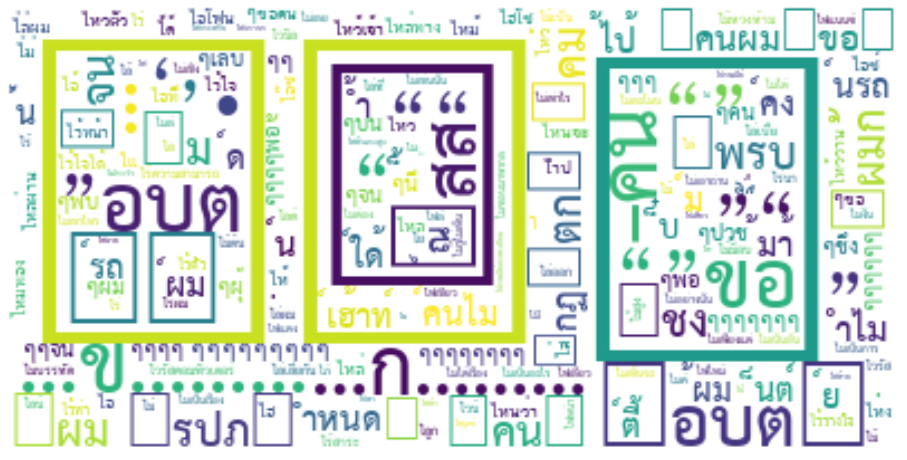

In [64]:
plt.figure(figsize = (16, 16))
plt.imshow(wc,interpolation="bilinear")
plt.axis("off")